# Identifying Patterns and Trends in Campus Placement Data using Machine Learning

### The IBM Hack Challenge Project 2023 aims to perform campus placement predictions through the help of modern data science approach and implementations.

### Project By - Yash Kumar Shukla

Importing necessary modules

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import pickle

In [64]:
df = pd.read_csv(r"C:\Users\yash0\OneDrive\Desktop\IBM Hack Challaenge\Placement_Data_Full_Class.csv")

Exploratory data analysis

In [65]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [66]:
df.shape

(215, 15)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [68]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [69]:
df['salary'].fillna(0, inplace=True)

In [70]:
df.drop(['sl_no'],axis=1,inplace=True)
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ssc_p,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
hsc_p,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
degree_p,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
etest_p,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
mba_p,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89
salary,215.0,198702.325581,154780.926716,0.00,0.000,240000.0,282500.000,940000.00


In [72]:
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [73]:
df['ssc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [74]:
df['hsc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [75]:
df['hsc_s'].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [76]:
df['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [77]:
df['workex'].unique()

array(['No', 'Yes'], dtype=object)

In [78]:
df['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [79]:
df['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [80]:
df.status.value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

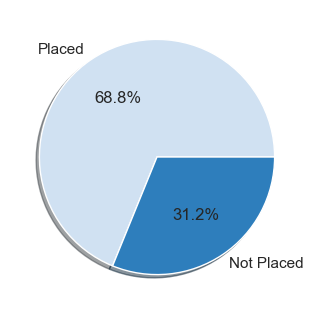

In [81]:
plt.style.use('_mpl-gallery-nogrid')
x = df.status.value_counts()
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))
plt.figure(figsize=(3,3))
plt.pie(x, colors=colors, labels=df['status'].unique(),
        wedgeprops={"linewidth": 1, "edgecolor": "white"}, shadow=True, autopct='%.1f%%')
plt.show()

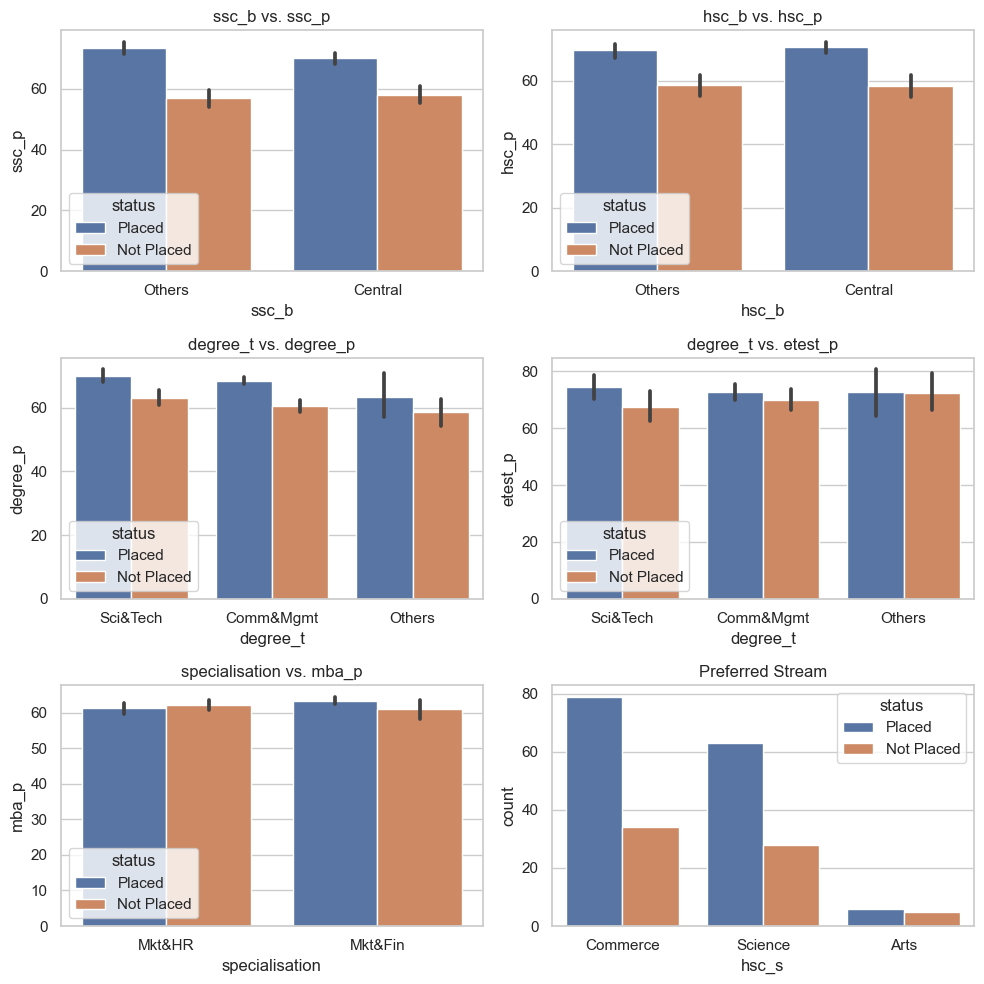

In [82]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))
sns.barplot(data=df, x="ssc_b", y="ssc_p", hue="status", ax=axes[0, 0])
axes[0, 0].set_title("ssc_b vs. ssc_p")
sns.barplot(data=df, x="hsc_b", y="hsc_p", hue="status", ax=axes[0, 1])
axes[0, 1].set_title("hsc_b vs. hsc_p")
sns.barplot(data=df, x="degree_t", y="degree_p", hue="status", ax=axes[1, 0])
axes[1, 0].set_title("degree_t vs. degree_p")
sns.barplot(data=df, x="degree_t", y="etest_p", hue="status", ax=axes[1, 1])
axes[1, 1].set_title("degree_t vs. etest_p")
sns.barplot(data=df, x="specialisation", y="mba_p", hue="status", ax=axes[2, 0])
axes[2, 0].set_title("specialisation vs. mba_p")
sns.countplot(data=df, x="hsc_s", hue="status", ax=axes[2, 1])
axes[2, 1].set_title("Preferred Stream")
plt.tight_layout()
plt.show()

The above plots show:-

1) Students who did not get a placement were having a percentage less than 60% in their secondary and higher secondary education.
2) The preferred stream in placement process is commerce then science.

<Axes: xlabel='gender', ylabel='count'>

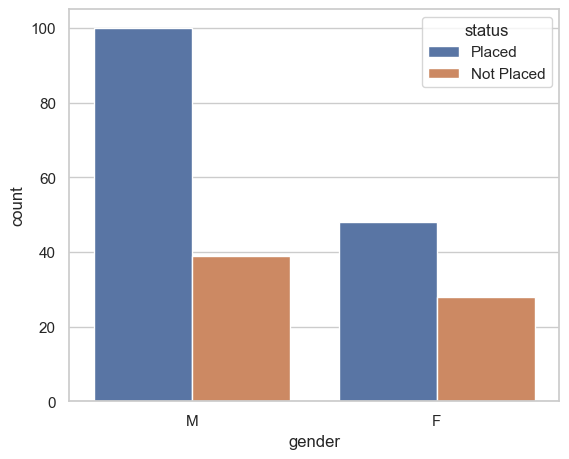

In [83]:
fig, ax = plt.subplots(figsize=(5,4))
sns.countplot(x="gender",data=df,hue="status",ax = ax)

It seems like there is a slight gender gap between male and female students but it can be neglected as male students are higher in ratio.

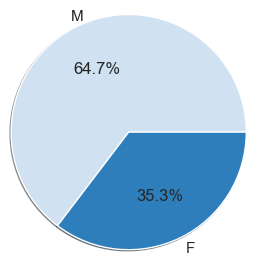

In [84]:
plt.style.use('_mpl-gallery-nogrid')
x = df.gender.value_counts()
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))
plt.figure(figsize=(1,1))
plt.pie(x, colors=colors, radius=3, center=(4, 4), labels=df['gender'].unique(),
        wedgeprops={"linewidth": 1, "edgecolor": "white"}, shadow=True, autopct='%.1f%%')
plt.show()

In [85]:
unique_statuses = df['status'].unique()
for status_value in unique_statuses:
    print("Value counts for status =", status_value)
    print(df[df['status'] == status_value]['ssc_b'].value_counts())

Value counts for status = Placed
Central    78
Others     70
Name: ssc_b, dtype: int64
Value counts for status = Not Placed
Central    38
Others     29
Name: ssc_b, dtype: int64


In [86]:
unique_statuses = df['status'].unique()
for status_value in unique_statuses:
    print("Value counts for status =", status_value)
    print(df[df['status'] == status_value]['hsc_b'].value_counts())

Value counts for status = Placed
Others     91
Central    57
Name: hsc_b, dtype: int64
Value counts for status = Not Placed
Others     40
Central    27
Name: hsc_b, dtype: int64


In [87]:
unique_statuses = df['status'].unique()
for status_value in unique_statuses:
    print("Value counts for status =", status_value)
    print(df[df['status'] == status_value]['workex'].value_counts())

Value counts for status = Placed
No     84
Yes    64
Name: workex, dtype: int64
Value counts for status = Not Placed
No     57
Yes    10
Name: workex, dtype: int64


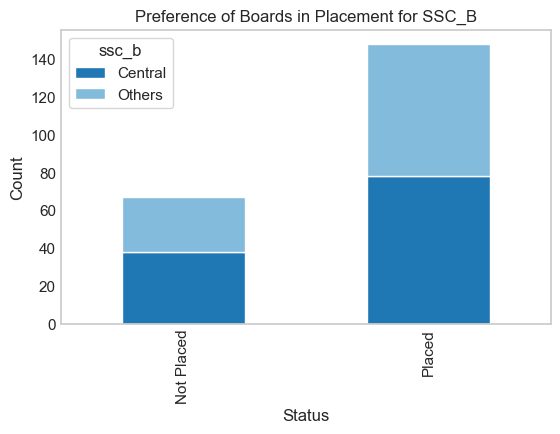

In [88]:
grouped_data = df.groupby(['status', 'ssc_b']).size().reset_index(name='count')
pivot_data = grouped_data.pivot(index='status', columns='ssc_b', values='count')
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(5,3))
plt.title("Preference of Boards in Placement for SSC_B")
plt.xlabel("Status")
plt.ylabel("Count")
plt.legend(title="ssc_b")
plt.show()

There is no such preference between secondary board as per the above plot.

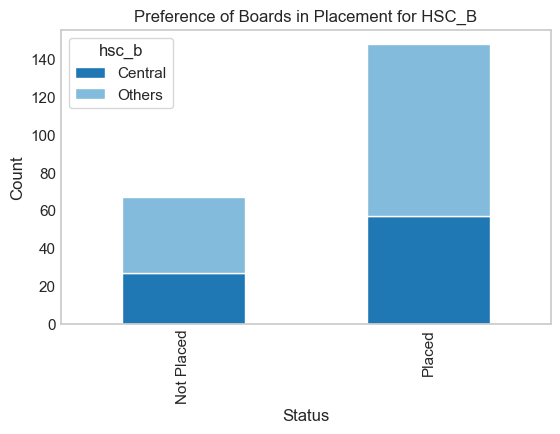

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
grouped_data = df.groupby(['status', 'hsc_b']).size().reset_index(name='count')
pivot_data = grouped_data.pivot(index='status', columns='hsc_b', values='count')
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(5,3))
plt.title("Preference of Boards in Placement for HSC_B")
plt.xlabel("Status")
plt.ylabel("Count")
plt.legend(title="hsc_b")
plt.show()

The above plot shows that companies are very likely to take students from non-central boards in the Higher Secondary Education of Students.

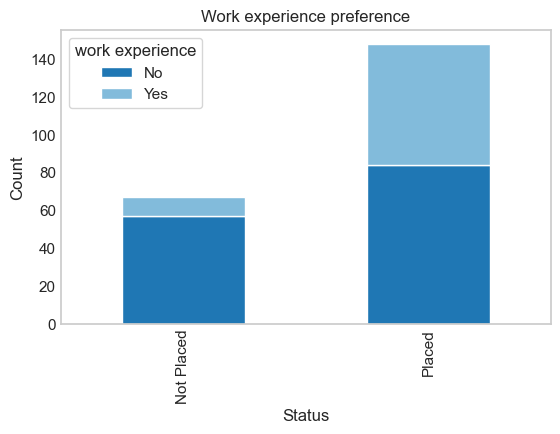

In [90]:
grouped_data = df.groupby(['status', 'workex']).size().reset_index(name='count')
pivot_data = grouped_data.pivot(index='status', columns='workex', values='count')
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(5,3))
plt.title("Work experience preference")
plt.xlabel("Status")
plt.ylabel("Count")
plt.legend(title="work experience")
plt.show()

The above plot shows that most of students who didn't get a placement were not having work eperience but also most the students who got placed were not having workexperience. This means academics has a higher hand over work experience.

<Axes: title={'center': 'Degree preference'}, xlabel='degree_t', ylabel='count'>

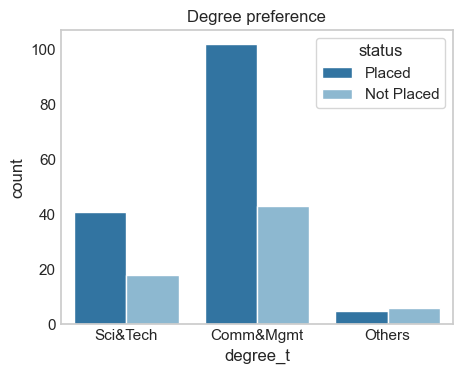

In [91]:
fig, ax = plt.subplots(figsize=(4,3))
plt.title("Degree preference")
sns.countplot(x="degree_t",data=df,hue="status", ax = ax)

The above plot shows that most preferred degree type is Commerce and Management. Thereafter comes Science and Technology.

<Axes: title={'center': 'Specialisation preference'}, xlabel='specialisation', ylabel='count'>

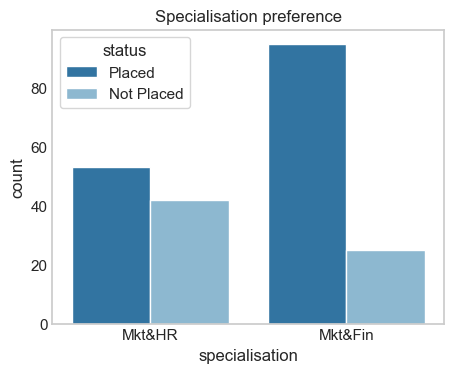

In [92]:
fig, ax = plt.subplots(figsize=(4,3))
plt.title("Specialisation preference")
sns.countplot(x="specialisation",data=df,hue="status", ax = ax)

By the above plot we can see that Marketing and Finance is the most preferred specialisation.

C:\Users\yash0\AppData\Local\Temp\ipykernel_25224\2929710361.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, ax=ax)


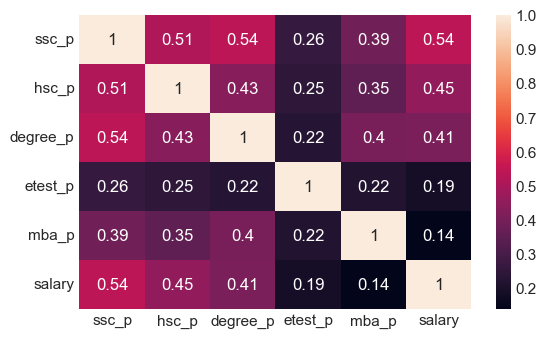

In [93]:
fig, ax = plt.subplots(figsize=(5,3))
sns.heatmap(df.corr(), annot=True, ax=ax)
plt.show()

Data Cleaning and Preprocessing

In [94]:
category_mappings = {}
categorical_columns = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']
le = LabelEncoder()
for col in categorical_columns:
    df[col + 'LE'] = le.fit_transform(df[col])
    category_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))
for col, mapping in category_mappings.items():
    print(f"Mapping for {col}: {mapping}")

Mapping for gender: {'F': 0, 'M': 1}
Mapping for ssc_b: {'Central': 0, 'Others': 1}
Mapping for hsc_b: {'Central': 0, 'Others': 1}
Mapping for hsc_s: {'Arts': 0, 'Commerce': 1, 'Science': 2}
Mapping for degree_t: {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2}
Mapping for workex: {'No': 0, 'Yes': 1}
Mapping for specialisation: {'Mkt&Fin': 0, 'Mkt&HR': 1}


In [95]:
df.drop(['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation'],axis=1,inplace=True)

In [96]:
df['Student_status'] = df['status'].replace({'Placed':1,'Not Placed':0})

In [97]:
df.drop(['status','salary'],axis=1,inplace=True)

In [98]:
df

,ssc_p,hsc_p,degree_p,etest_p,mba_p,genderLE,ssc_bLE,hsc_bLE,hsc_sLE,degree_tLE,workexLE,specialisationLE,Student_status
0,67.00,91.00,58.00,55.0,58.80,1,1,1,1,2,0,1,1
1,79.33,78.33,77.48,86.5,66.28,1,0,1,2,2,1,0,1
2,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,1,0,0,2,2,0,1,0
4,85.80,73.60,73.30,96.8,55.50,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,1,1,1,1,0,0,0,1
211,58.00,60.00,72.00,74.0,53.62,1,1,1,2,2,0,0,1
212,67.00,67.00,73.00,59.0,69.72,1,1,1,1,0,1,0,1
213,74.00,66.00,58.00,70.0,60.23,0,1,1,1,0,0,1,1


In [99]:
ss = StandardScaler()
ss.fit_transform(df)

array([[-0.02808697,  2.2688123 , -1.14010225, ..., -0.72444647,
         1.12390297,  0.67283185],
       [ 1.11336869,  1.10344799,  1.51326671, ...,  1.38036423,
        -0.88975652,  0.67283185],
       [-0.21323793,  0.15331275, -0.32284282, ..., -0.72444647,
        -0.88975652,  0.67283185],
       ...,
       [-0.02808697,  0.06133451,  0.90304633, ...,  1.38036423,
        -0.88975652,  0.67283185],
       [ 0.61994138, -0.03064373, -1.14010225, ..., -0.72444647,
         1.12390297,  0.67283185],
       [-0.49096436, -0.76646966, -1.82115177, ..., -0.72444647,
         1.12390297, -1.48625544]])

Data Modelling

In [100]:
x = df.drop(['Student_status'],axis = 1)
x

,ssc_p,hsc_p,degree_p,etest_p,mba_p,genderLE,ssc_bLE,hsc_bLE,hsc_sLE,degree_tLE,workexLE,specialisationLE
0,67.00,91.00,58.00,55.0,58.80,1,1,1,1,2,0,1
1,79.33,78.33,77.48,86.5,66.28,1,0,1,2,2,1,0
2,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,0,0
3,56.00,52.00,52.00,66.0,59.43,1,0,0,2,2,0,1
4,85.80,73.60,73.30,96.8,55.50,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,1,1,1,1,0,0,0
211,58.00,60.00,72.00,74.0,53.62,1,1,1,2,2,0,0
212,67.00,67.00,73.00,59.0,69.72,1,1,1,1,0,1,0
213,74.00,66.00,58.00,70.0,60.23,0,1,1,1,0,0,1


In [101]:
y = df['Student_status']
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: Student_status, Length: 215, dtype: int64

In [102]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42, stratify = y)

In [103]:
lr = LogisticRegression().fit(x_train,y_train)
dt = DecisionTreeClassifier().fit(x_train,y_train)
rf = RandomForestClassifier().fit(x_train,y_train)
lda = LinearDiscriminantAnalysis().fit(x_train,y_train)
gnb = GaussianNB().fit(x_train,y_train)
sv = svm.SVC().fit(x_train,y_train)
knn = KNeighborsClassifier().fit(x_train,y_train)

C:\Users\yash0\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [104]:
y_pred_lr = lr.predict(x_test)
y_pred_dt = dt.predict(x_test)
y_pred_rf = rf.predict(x_test)
y_pred_lda = lda.predict(x_test)
y_pred_gnb = gnb.predict(x_test)
y_pred_sv = sv.predict(x_test)
y_pred_knn = knn.predict(x_test)

In [105]:
y_pred_lr

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0],
      dtype=int64)

In [106]:
y_pred_dt

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
      dtype=int64)

In [107]:
y_pred_rf

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0],
      dtype=int64)

In [108]:
y_pred_lda

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [109]:
y_pred_gnb

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [110]:
y_pred_sv

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0],
      dtype=int64)

In [111]:
y_pred_knn

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0],
      dtype=int64)

In [112]:
confusion_matrix(y_test,y_pred_lr)

array([[10,  3],
       [ 4, 26]], dtype=int64)

In [113]:
confusion_matrix(y_test,y_pred_dt)

array([[ 6,  7],
       [ 3, 27]], dtype=int64)

In [114]:
confusion_matrix(y_test,y_pred_rf)

array([[ 7,  6],
       [ 2, 28]], dtype=int64)

In [115]:
confusion_matrix(y_test,y_pred_lda)

array([[11,  2],
       [ 4, 26]], dtype=int64)

In [116]:
confusion_matrix(y_test,y_pred_gnb)

array([[11,  2],
       [ 1, 29]], dtype=int64)

In [117]:
confusion_matrix(y_test,y_pred_sv)

array([[ 7,  6],
       [ 0, 30]], dtype=int64)

In [118]:
confusion_matrix(y_test,y_pred_knn)

array([[ 7,  6],
       [ 1, 29]], dtype=int64)

In [119]:
acc_logisreg = accuracy_score(y_test,y_pred_lr)*100
acc_dtree = accuracy_score(y_test,y_pred_dt)*100
acc_rf = accuracy_score(y_test,y_pred_rf)*100
acc_lda = accuracy_score(y_test,y_pred_lda)*100
acc_gnb = accuracy_score(y_test,y_pred_gnb)*100
acc_sv = accuracy_score(y_test,y_pred_sv)*100
acc_knn = accuracy_score(y_test,y_pred_knn)*100

In [120]:
models = pd.DataFrame({
    'Model':['Logistic Regression','Decision Tree','Random Forest','Linear Discriminant Analysis','Naive Bayes','Support Vector Machines','K - Nearest Neighbors'], 'Score': [acc_logisreg,acc_dtree,acc_rf,acc_lda,acc_gnb,acc_sv,acc_knn]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Naive Bayes,93.023256
3,Linear Discriminant Analysis,86.046512
5,Support Vector Machines,86.046512
0,Logistic Regression,83.720930
6,K - Nearest Neighbors,83.720930
2,Random Forest,81.395349
1,Decision Tree,76.744186


The above data shows that Gaussian Naive Bayes works good for the campus placement data with a 93% accuracy.

In [121]:
model = GaussianNB()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(model, x, y, cv=kf)
average_accuracy = accuracy_scores.mean()
std_accuracy = accuracy_scores.std()
print("Average Accuracy:", average_accuracy*100)
print("Standard Deviation of Accuracy:", std_accuracy)


Average Accuracy: 81.3953488372093
Standard Deviation of Accuracy: 0.03891441983879421


The KFold validation tells us that we have a good average accuracy of 81% and standard deviation of 0.03. Now we can save the model in a pickle file.

In [122]:
pickle.dump(gnb,open('classification_gnb.pkl','wb'))